In [ ]:
import pandas as pd
df = pd.read_csv('./heart_failure_clinical_records_dataset.csv') #importing dataset

In [ ]:
from sklearn.model_selection import train_test_split
X= df.drop("DEATH_EVENT",axis=1).values #axis needed #df.drop death event is the variable we are predicting, it is not a dependent variable it is a independent variable
y = df["DEATH_EVENT"].values #what we are trying to predict
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier #we are classifying - limited range of values - dead or not dead

In [ ]:
gbk = GradientBoostingClassifier(learning_rate=0.25,n_estimators=32) #previously empty and the accuracy is still really high
gbk.fit(x_train,y_train) #fitting the data to model is plotting it on a graph - teaching model how to predict - giving it data to train it and training model
y_pred = gbk.predict(x_test) #makes a prediction of values once it has learnt all of the data

In [ ]:
from sklearn.metrics import accuracy_score #seeing how well it performs

In [ ]:
acc_gbk = round(accuracy_score(y_pred,y_test)*100,2) 
print(acc_gbk)

83.33


In [ ]:
from sklearn.metrics import classification_report
classification_report(y_test,y_pred) #how many of the predictions are correct - out of all the accurate predictions and false predictions how many was correct
#formula for recall - tp/tp+fn
#formula for precision = tp/tp+fp
#f1-score combines precision and recall = precison x recall/precison + recall
# how many accurate predictions does the model actually make - 
#accuracy model = 
# how many accurate predictions of all the predictions
#accuracy = tp+fn/tp+fn+fp+fn

'              precision    recall  f1-score   support\n\n           0       0.81      0.95      0.88        37\n           1       0.88      0.65      0.75        23\n\n    accuracy                           0.83        60\n   macro avg       0.85      0.80      0.81        60\nweighted avg       0.84      0.83      0.83        60\n'

In [ ]:
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01] #hyperparameter tuning - learning rate tells you how much the model needs to be changed (improved) based on the error rate - prediction compared to actual value - reducing errors 
for eta in learning_rates: #if our prediction is very wrong, the learning rate is reduced so the model can understand what it is learning so the prediction is closer to the actual value
  model = GradientBoostingClassifier(learning_rate=eta) # accuracy and precision - not overfitting - overfitting is when the model performs well on seen data (training) and not on unseen data (testing)
  model.fit(x_train, y_train) 
  train_pred = model.predict(x_train)
  y_pred = model.predict(x_test)

In [ ]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.77      0.97      0.86        37\n           1       0.92      0.52      0.67        23\n\n    accuracy                           0.80        60\n   macro avg       0.84      0.75      0.76        60\nweighted avg       0.83      0.80      0.78        60\n'

In [ ]:
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01] #hyperparameter tuning - changing default values - more support - 
for eta in learning_rates:
  model = GradientBoostingClassifier(learning_rate=eta) #without learning rate you would have default values - data does not change - you can get good prediction values - 
  #n_estimators - boosting stages - how many times we teach the model to get it to make a better precision value
  #gridsearch looks at all the parameters of the specific model and given a range of values for the parameters it picks the ones that give us the best model
  model.fit(x_train, y_train)
  train_pred = model.predict(x_train)
  y_pred = model.predict(x_test)

In [ ]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
for estimator in n_estimators:
  model = GradientBoostingClassifier(n_estimators=estimator,learning_rate=eta)
  #gradient boosting is a using a range of weak decision trees to make one strong predictive model - increasing number of trees - we get a stronger model if we use a lot of them
  model.fit(x_train, y_train)
  train_pred = model.predict(x_train)
  y_pred = model.predict(x_test)

In [ ]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.74      0.95      0.83        37\n           1       0.85      0.48      0.61        23\n\n    accuracy                           0.77        60\n   macro avg       0.80      0.71      0.72        60\nweighted avg       0.78      0.77      0.75        60\n'

In [ ]:
max_features = list(range(1,df.shape[1]))
for max_feature in max_features:
  model = GradientBoostingClassifier(max_features=max_feature)
  model.fit(x_train, y_train)
  train_pred = model.predict(x_train)
  y_pred = model.predict(x_test)

In [ ]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.75      0.97      0.85        37\n           1       0.92      0.48      0.63        23\n\n    accuracy                           0.78        60\n   macro avg       0.83      0.73      0.74        60\nweighted avg       0.81      0.78      0.76        60\n'

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
kFold = KFold(n_splits = 3, random_state = 7) #splitting dataset down into 3 parts - we train one part, we test one part, and we see how well it performed (evaluating) - you switch around the parts

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [ ]:
results = cross_val_score(model,x_train,y_train,cv = kFold,scoring = 'accuracy') #it performs better (like hyperparamter tuning - default parameter) - giving it a new parameter which is kfold - giving it previous results 

In [ ]:
print(results.mean())

0.8073839662447257


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
gbc = GradientBoostingClassifier()
parameters = {
    "n_estimators":[5,32,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.05,0.25,0.5,1]
}

In [ ]:
from sklearn.model_selection import GridSearchCV 
cv = GridSearchCV(gbc,parameters,cv=5) 
results = cv.fit(x_train,y_train.values.ravel())

AttributeError: ignored

In [ ]:
import numpy as np
print('grid' , (results.best_score_, results.best_params_))

AttributeError: ignored

In [ ]:
def display(results):
  print(f'Best parameters are: {results.best_params_}')
  print("\n")
  params = results.cv_results_['params']
  for params in zip(params):
    params = results.cv_results_['params']

In [ ]:
display(cv)

AttributeError: ignored

In [ ]:
pip install memory_profiler

  Created wheel for memory-profiler: filename=memory_profiler-0.58.0-cp37-none-any.whl size=30180 sha256=2761a5746c41f243311435fddf038ecf30e1a92921d708e08aac4b3bed491760
  Stored in directory: /root/.cache/pip/wheels/02/e4/0b/aaab481fc5dd2a4ea59e78bc7231bb6aae7635ca7ee79f8ae5
Successfully built memory-profiler


In [ ]:
%load_ext memory_profiler

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


In [ ]:
%memit gbk

peak memory: 163.13 MiB, increment: 0.00 MiB


In [ ]:
%memit gbk.fit(x_train,y_train)

peak memory: 163.54 MiB, increment: 0.00 MiB


In [ ]:
%memit y_pred

peak memory: 163.57 MiB, increment: 0.00 MiB


In [ ]:
%memit model

peak memory: 163.82 MiB, increment: 0.00 MiB


In [ ]:
%memit model.fit(x_train,y_train)

peak memory: 163.83 MiB, increment: 0.00 MiB


In [ ]:
%memit train_pred

peak memory: 163.83 MiB, increment: 0.00 MiB


In [ ]:
%memit y_pred

peak memory: 163.83 MiB, increment: 0.00 MiB


In [ ]:
%memit gbc

peak memory: 163.83 MiB, increment: 0.00 MiB


In [ ]:
%memit cv

peak memory: 164.22 MiB, increment: 0.00 MiB


In [ ]:
%memit results

peak memory: 164.58 MiB, increment: 0.00 MiB


In [ ]:
#Cost assumptions
'''Cost of FP: 1, cost of FN: 2, cost of TN: 0, cost of TP: -1'''
cost_TP = -1; cost_FP = 1; cost_FN = 2; cost_TN = 0;
cb_matrix = -1*np.array([[cost_TP, cost_FP],[cost_FN, cost_TN]])

In [ ]:
def standard_confusion_matrix(y_true, y_predict):
    TP = sum((y_true == 1) & (y_predict == 1))
    TN = sum((y_true == 0) & (y_predict == 0))
    FP = sum((y_true == 0) & (y_predict == 1))
    FN = sum((y_true == 1) & (y_predict == 0))
    
    return np.array([[TP,FP],[FN,TN]])

In [ ]:
def profit_curve(cb, predict_probas, labels):
    indices = np.argsort(predict_probas)
    sorted_probs = predict_probas[indices]
    sorted_labels = labels[indices]
    
    profit_list = []
    
    for sp, sl in zip(sorted_probs, sorted_labels):
        predict_labels = sorted_probs > sp + .0001
        conf_mat = standard_confusion_matrix(sorted_labels, predict_labels)
        profit_list.append((cb * conf_mat).sum() / float(len(labels)))
    return profit_list, sorted_probs

In [ ]:
def plot_profit_curve(model, label, costbenefit, X_train, X_test, y_train, y_test, col):
    model.fit(X_train, y_train)
    predict_probas = model.predict_proba(X_test)[:,1]
    profit_list, sorted_probs = profit_curve(costbenefit, predict_probas, y_test)
    max_index = np.argmax(profit_list)
    max_threshold = sorted_probs[max_index]
    max_profit = profit_list[max_index]
    
    plt.plot(sorted_probs, profit_list, label=label, color=col, linewidth=3)
    plt.plot(max_threshold, max_profit, '.', color=col, markersize=18)

In [ ]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

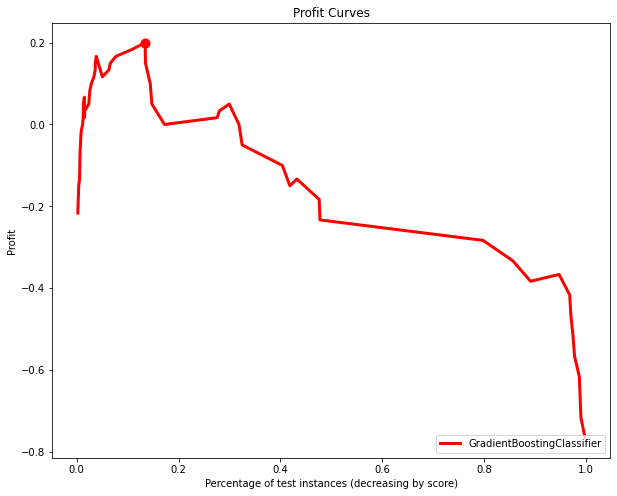

In [ ]:
models = [gbc]
fig = plt.figure(figsize=(10,8))
# fig.set_facecolor('#F2F2F2')
colors = ['r', 'g', 'b', 'm']
for i, model in enumerate(models):
    plot_profit_curve(model, model.__class__.__name__, cb_matrix,
                      x_train, x_test, y_train, y_test, colors[i])
plt.title("Profit Curves")
plt.xlabel("Percentage of test instances (decreasing by score)")
plt.ylabel("Profit")
plt.legend(loc='lower right')
plt.savefig('Profit_curve.png', facecolor=fig.get_facecolor())
plt.show()

In [ ]:
report = classification_report(y_test,y_pred,output_dict = True)
import seaborn as sns
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True)

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test,y_pred)
print(cf_matrix)

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [ ]:
from sklearn.metrics import roc_auc_score
auc_score1 = roc_auc_score(y_test, y_pred)
print(auc_score1)


In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
metrics.plot_roc_curve(gbk, x_test, y_test)
plt.show()



In [ ]:
import time

In [ ]:
%timeit gbk

In [ ]:
%timeit gbk.fit(x_train,y_train)

In [ ]:
%timeit y_pred

In [ ]:
%timeit model

In [ ]:
%timeit model.fit(x_train,y_train)

In [ ]:
%timeit train_pred

In [ ]:
%timeit y_pred

In [ ]:
%timeit gbc

In [ ]:
%timeit cv

In [ ]:
%timeit results

https://stackoverflow.com/questions/28200786/how-to-plot-scikit-learn-classification-report
https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
https://github.com/SydneyLauren/Profit-curves-and-xkcd-plotting
https://community.datarobot.com/t5/resources/profit-curve/ta-p/7389
https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/
https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5
https://gist.github.com/fclesio/bb5871281debc07d75127552c56b08b5
https://stackoverflow.com/questions/61705257/sklearn-plotting-classification-report-gives-a-different-output-than-basic-avg
https://www.pyimagesearch.com/2016/08/15/how-to-tune-hyperparameters-with-python-and-scikit-learn/
https://towardsdatascience.com/
https://www.displayr.com/gradient-boosting-the-coolest-kid-on-the-machine-learning-block/
https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/
https://github.com/Prajwal10031999/Titanic-Passenger-Survival-Predictions-using-machine-learning/blob/main/titanic-survival-predictions.ipynb
https://github.com/jakemath/KNN-SKLearn/blob/master/knn.ipynb